In [2]:
import pandas as pd
import numpy as np


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv', usecols=['Age', 'Fare', 'Survived'])

In [7]:
df.dropna(inplace = True)

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
df.isna().sum()

,0
Survived,0
Age,0
Fare,0


In [17]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [18]:
df.shape

(714, 3)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis = 1), df['Survived'], test_size = 0.2, random_state = 42)

In [20]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [21]:
clf = DecisionTreeClassifier()

In [22]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.6293706293706294

In [25]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv = 10, scoring = 'accuracy'))

np.float64(0.6275234741784037)

In [26]:
kbin_age = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [28]:
trf = ColumnTransformer([
    ('first', kbin_age, [0]),
    ('second', kbin_fare, [1])
])

In [31]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [32]:
trf.named_transformers_['first'].n_bins

10

In [35]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [37]:
output = pd.DataFrame({
    'age' : X_train['Age'],
    'age_trf' : X_train_trf[:, 0],
    'fare' : X_train['Fare'],
    'fare_trf' : X_train_trf[:, 1]
})

In [39]:
output['age_labels'] = pd.cut(x = X_train['Age'], bins = trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x = X_train['Fare'], bins = trf.named_transformers_['second'].bin_edges_[0].tolist())

In [42]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
806,39.0,7.0,0.0000,0.0,"(36.0, 42.0]",NaN
514,24.0,3.0,7.4958,0.0,"(22.0, 25.0]","(0.0, 7.75]"
151,22.0,3.0,66.6000,8.0,"(19.0, 22.0]","(51.479, 82.171]"
621,42.0,8.0,52.5542,8.0,"(36.0, 42.0]","(51.479, 82.171]"
874,28.0,4.0,24.0000,5.0,"(25.0, 28.5]","(15.75, 26.0]"


In [43]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [44]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [45]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6358959311424099)

In [46]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6288536776212833


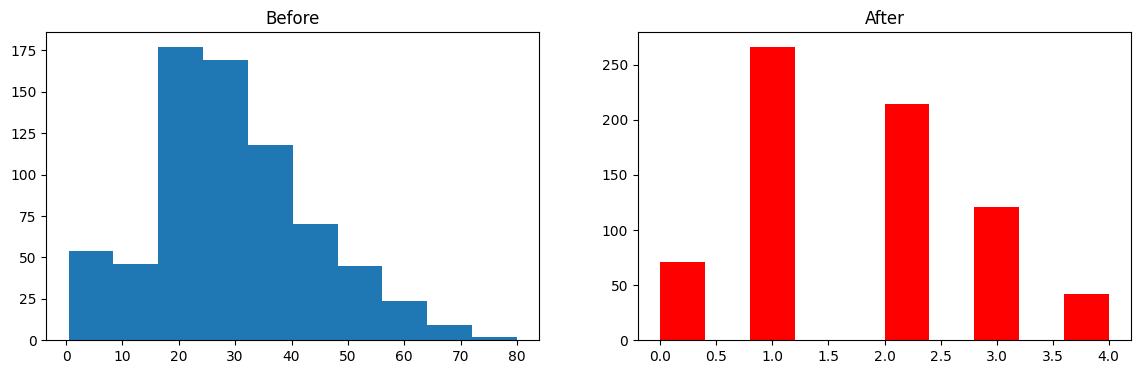

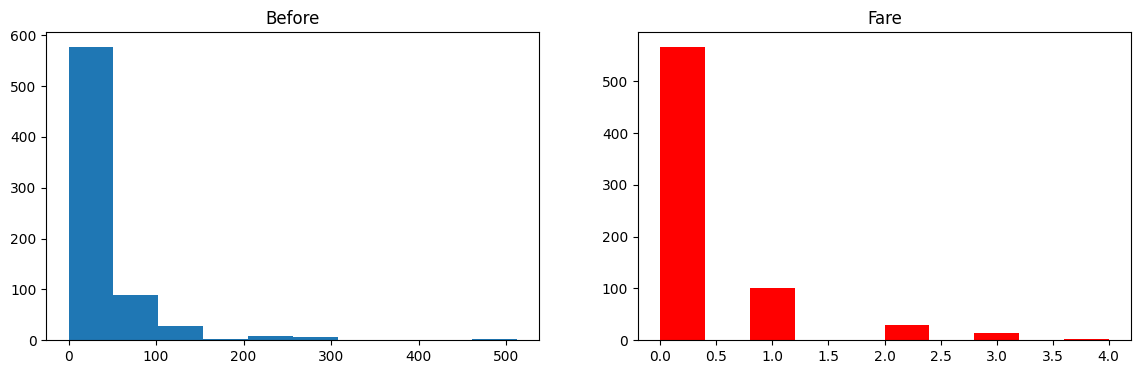

In [47]:
discretize(5,'kmeans')

0.6330985915492957


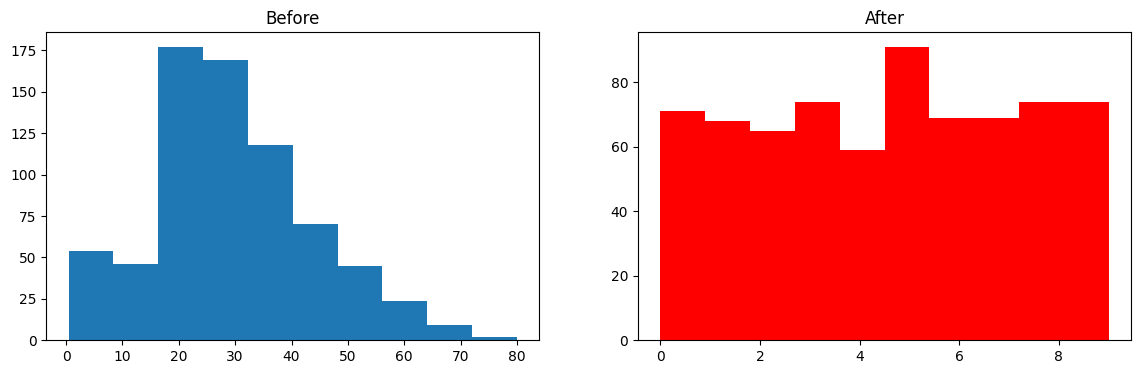

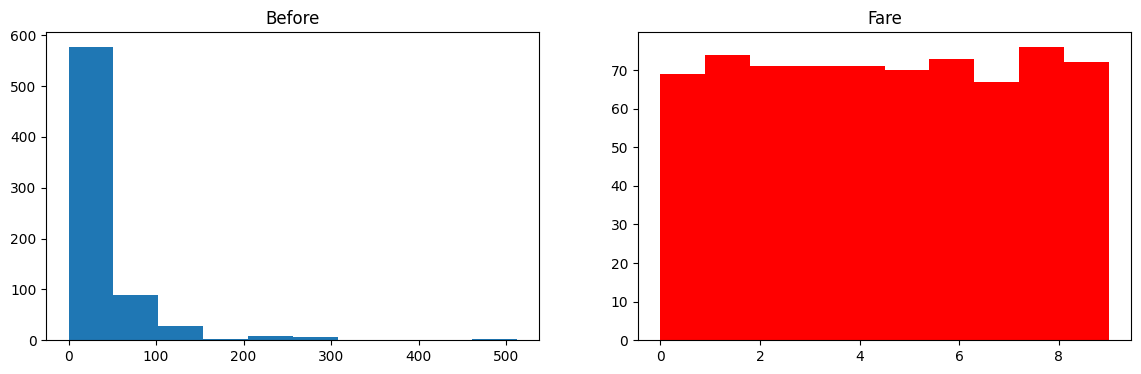

In [48]:
discretize(10,'quantile')